In [8]:
import json
import numpy as np
import scipy
import rouge
import matplotlib.pyplot as plt
import pickle
from scipy.special import softmax

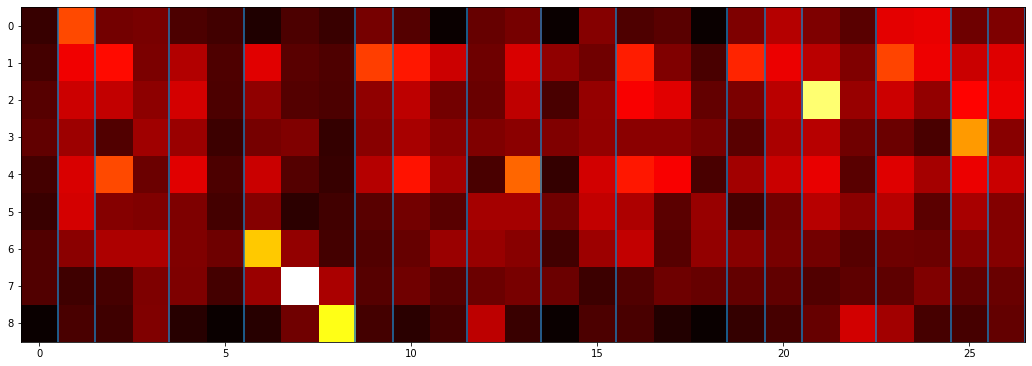

In [92]:
rouge_scores = np.load("rouge_full.npy")
rouge_meta = json.load(open("rouge_meta.json"))
def plot_rouge(scores, example):
    
    fig = plt.figure()
    fig.set_size_inches(18, 20)
    #, "rouge_l_f_score"]
    # results: (example, input_paragraph, summary_sentence)
    (num_examples, num_paragraphs, num_para_sentences, num_summary_sentences, num_metrics) = np.shape(scores) 
    
    # find limits
    # flatten paragraphs & sentences to one dimension:
    scores_example = scores[example]
    patches = [scores_example[para, :rouge_meta[example]["paragraph_sentences"][para], :rouge_meta[example]["summary_sentences"]]
          for para in range(rouge_meta[example]["paragraphs"])]
    img = np.vstack(patches)
    plt.imshow(img[:,:,0].T, cmap='hot', interpolation='nearest')
    sum_sen = 0
    for para in range(rouge_meta[example]["paragraphs"]):
        sum_sen = sum_sen + rouge_meta[example]["paragraph_sentences"][para]
        plt.axvline(sum_sen-0.5)
    plt.show()
    


        
        
plot_rouge(rouge_scores, 1)


    


In [ ]:

r = pickle.load(open('r.p','rb'))

In [ ]:
r1s = -np.ones((10,30*12))
r2s = -np.ones((10,30*12))
means = -np.ones((10,30*12))
for e in range(10):
    r1,r2 = asd("rouge.json", example=e)
    mean = r["Mean"][e,0,:np.shape(r1)[1],7,7,:np.shape(r1)[0]].T
    
    #r1 = r1 / np.sum(r1, axis=0)
    
        
    r2 = softmax(r2, axis=0)
    tmp3 = r2.reshape(-1,)
    
    
    #print(np.max(r1))
    r1 = softmax(r1, axis=0)
    tmp = r1.reshape(-1,)
    r1s[e,:tmp.shape[0]] = tmp
    tmp2 = mean.reshape(-1,)
    means[e,:tmp.shape[0]] = tmp2
    
    r2s[e,:tmp3.shape[0]] = tmp3
 
r1s = r1s.reshape(-1,)
r1s = r1s[r1s != -1]

r2s = r2s.reshape(-1,)
r2s = r2s[r2s != -1]

means = means.reshape(-1,)
means = means[means != -1]

corr = np.corrcoef([r1s, means, r2s])
print(f"{corr[0,1]} | {corr[2,1]}")
#print(softmax(corr, axis=1))

In [ ]:
plt.scatter(r1s, means)
plt.scatter(r2s, means)

In [ ]:

plt.scatter(r1s, means)

In [ ]:
s = 0
for e in range(10):
    r1,r2 = asd("rouge.json", example=e)
    mean = r["Mean"][e,0,:np.shape(r1)[1],7,7,:np.shape(r1)[0]].T
    
    #r1 = r1 / np.sum(r1, axis=0)
    #print(np.max(r1))
    r1 = softmax(r1, axis=0)
    tmp1 = r1.reshape(-1,)
    
    r2 = softmax(r2, axis=0)
    tmp3 = r2.reshape(-1,)
    
    s += tmp1.shape[0]
    tmp2 = mean.reshape(-1,)
    corr = np.corrcoef(np.array([tmp1,tmp2, tmp3]))
    
    #print(corr[0,1])
    plt.figure()
    plt.scatter(tmp1,tmp2)
    print(f"{corr[0,1]} | {corr[2,1]}")


#print(softmax(corr, axis=1))

In [ ]:
for e in range(10):
    r1,r2 = asd("rouge.json", example=e)
    corr = np.corrcoef(r1.reshape(-1,), r2.reshape(-1,))
    print(corr[0,1])


In [ ]:
def magic(path="data/MultiNews_data_tfidf_paddle_paragraph_small/test/MultiNews.30.test.0.json"):
    test_json = json.load(open(path))

    para_sen_num = -np.ones((len(test_json), 30) ,dtype=np.int)

    for e in range(len(test_json)):
        for j,p in enumerate(test_json[e]["src_str"]):
             para_sen_num[e,j] = len(p.split("."))
    return para_sen_num
            

In [ ]:
for e in range(len(test_json)):
    print(test_json[e]["tgt_str"])

179 2401 57 3764 9 6727 40 10 69 1947 18 2480 19 54 6642 12246 2892 26 9 6650 525 1386 567 10 31 0 4465 541 3022 5895 38 13661 12117 10 214 23 6060 13 9 553 13 61 12707 11
